In [15]:
#import the required libraries

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [16]:
#Load the data file


food = pd.read_csv(r"C:\Users\Lucy\Downloads\archive (34).zip")

In [17]:
food.head()


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [18]:
#rename week & salesinthousands
food.rename(columns = {'week':'Week', 'SalesInThousands':'Sales'}, inplace = True)


In [19]:
#Data Exploration
food.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MarketID    548 non-null    int64  
 1   MarketSize  548 non-null    object 
 2   LocationID  548 non-null    int64  
 3   AgeOfStore  548 non-null    int64  
 4   Promotion   548 non-null    int64  
 5   Week        548 non-null    int64  
 6   Sales       548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [20]:
# Checking for duplicates
len(food[food.duplicated()])


0

In [21]:
# Checking for nulls

food.isna().sum()

MarketID      0
MarketSize    0
LocationID    0
AgeOfStore    0
Promotion     0
Week          0
Sales         0
dtype: int64

In [22]:
#Univariate Analysis


def plot_count(col):
    ax = sns.countplot(x=food[col], palette=sns.color_palette('flare'))
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'"{col}" Categories Count')
    plt.show()


In [23]:
def plot_dist(col):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 2, 1)
    sns.histplot(x=food[col], kde=True, ax=ax1)
    plt.title(f'Histogram of "{col}"')
    
    ax2 = plt.subplot(2, 2, 2)
    sns.boxplot(x=food[col], ax=ax2)
    plt.title(f'Boxplot of "{col}"')
    
    plt.show()

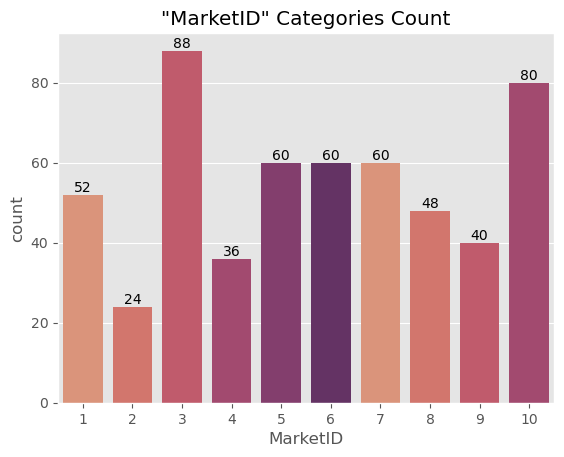

In [24]:
#Different markets were not selected equal number of times,
#MarketID: unique identifier for market numbers (1-10)

#with market 3 being the most selected, followed by Market 10.


plot_count('MarketID')

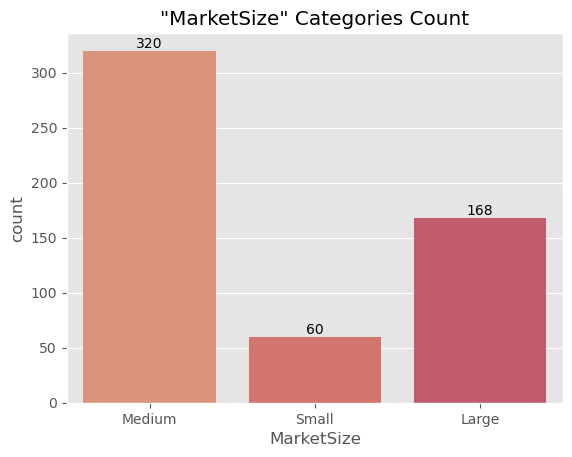

In [25]:
# Visualize unique values for the 'MarketSize' column using a bar plot
# The majority of selected markets were of medium size.

plot_count('MarketSize')

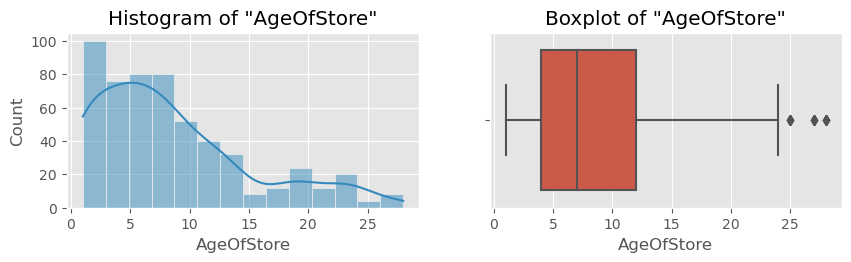

In [26]:
#ageofstore in years
#The majority of stores can be considered relatively "young", with a median of 7 years.



plot_dist('AgeOfStore')

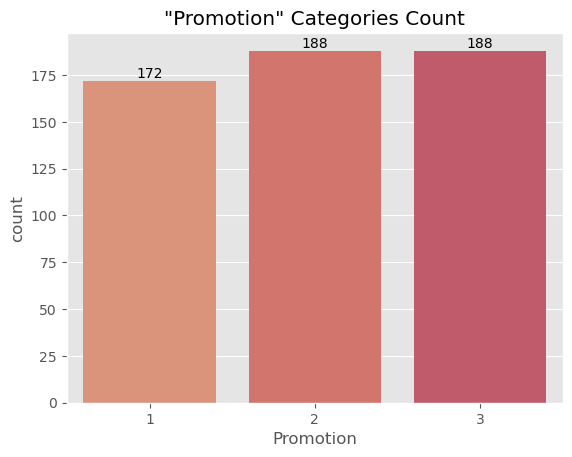

In [27]:
#The first promotion was applied 8.5% less than the other two promotions.


plot_count('Promotion')


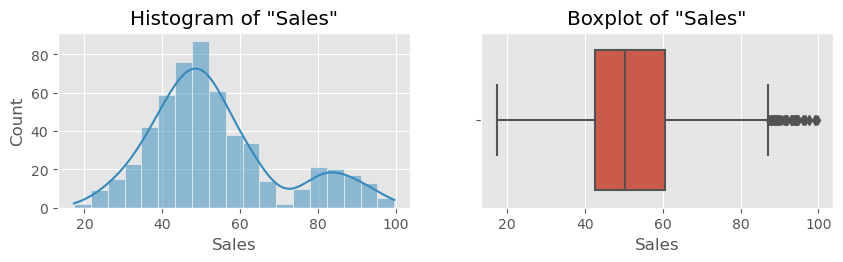

In [28]:
#The distribution of sales is skewed to the right.
#Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set.
#Skewness is demonstrated on a bell curve when data points are not distributed 
#symmetrically to the left and right sides of the median on a bell curve.

plot_dist('Sales')


In [29]:
#Bivariate Analysis

def plot_count_cat(col1, col2):
    counts_food = food.groupby(col1)[col2].value_counts(sort=False).unstack().fillna(0)
    colors = ['salmon', 'indianred', 'crimson']
    counts_food.plot(kind='bar', stacked=True, color=colors)
    plt.title(f'"{col2}" Categories According to "{col1}"')
    plt.show()


In [30]:
def plot_count_con(col1, col2):
    sns.barplot(x=food[col1], y=food[col2], palette='Reds')
    plt.title(f'"{col2}" According to "{col1}"')
    plt.show()

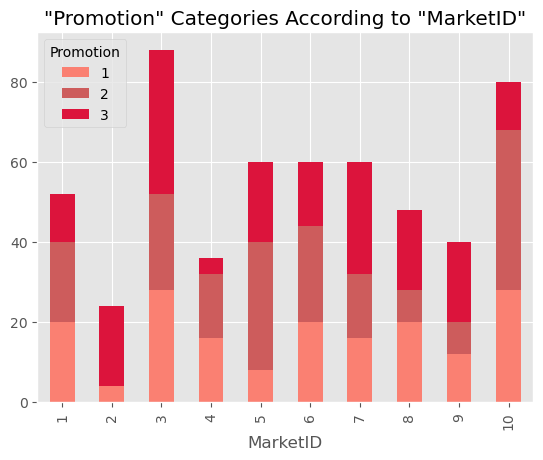

In [31]:
#The three promotions were not applied uniformly in all markets. 
#The second promotion was not applied at all at Market 2.


plot_count_cat('MarketID', 'Promotion')

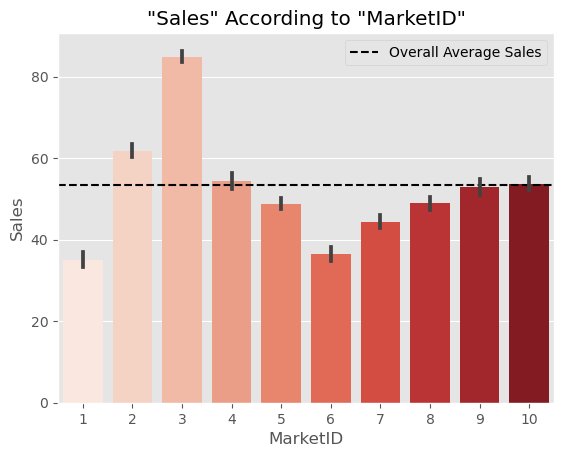

In [32]:
#Market 3 generated the highest amount of sales, 
#followed by market 2. The rest of markets were less than or equal to the overall average.


plt.axhline(y=food.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('MarketID', 'Sales')


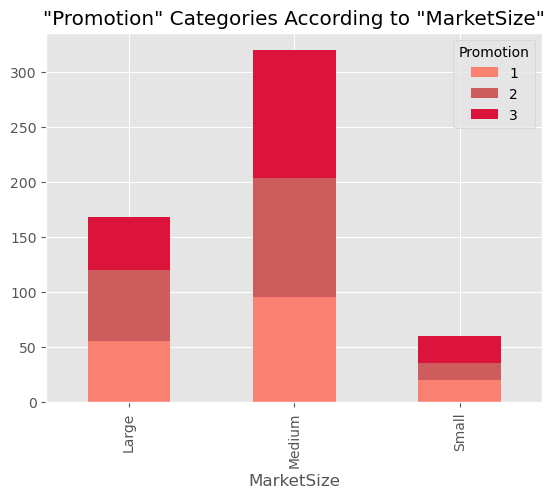

In [33]:
#The three promotions were approximately equally distributed for each market size.


plot_count_cat('MarketSize', 'Promotion')


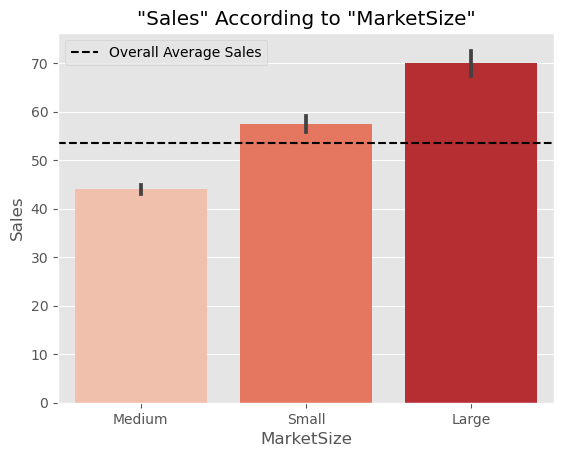

In [34]:
#this means Large markets, although not representing the highest number of markets, 
#generated the highest amount of sales. 
#Small markets too scored more than the overall average of sales


plt.axhline(y=food.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('MarketSize', 'Sales')


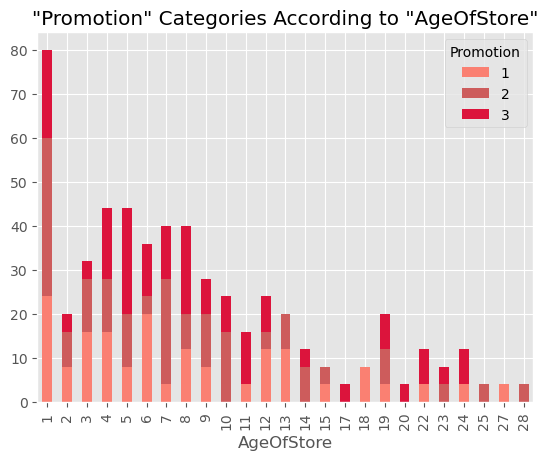

In [35]:
#The three promotions were not applied uniformly in stores of different ages. 
#Stores with certain ages witnessed the application of two or only one promotion.


plot_count_cat('AgeOfStore', 'Promotion')


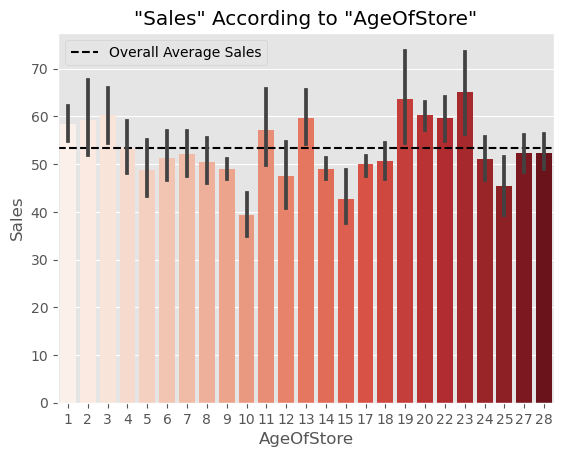

In [50]:
#Although representing a small number of stores, 
#stores with ages of 23 and 19 years generated the highest amounts of sales per store.

#We can also see that only 9 stores generated more sales than the overall average

plt.axhline(y=food.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('AgeOfStore', 'Sales')


In [ ]:
#Sales were uniformly distributed between all four weeks, approximately equal to the overall average.


plt.axhline(y=food.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('Week', 'Sales')


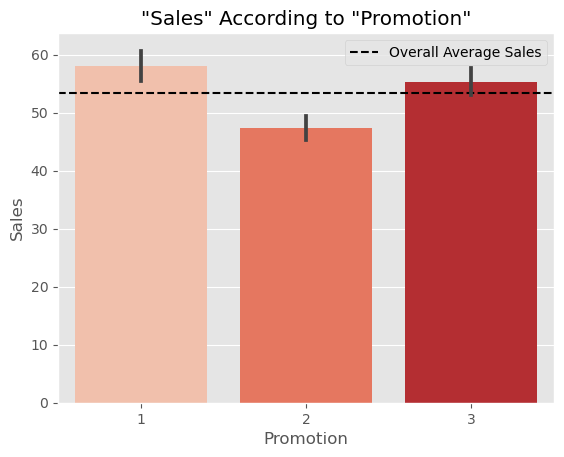

In [37]:
plt.axhline(y=food.Sales.mean(), color='k', linestyle='--', label='Overall Average Sales')
plt.legend()
plot_count_con('Promotion', 'Sales')


In [38]:
#It seems that the first promotion generated the highest amount of sales, 
#followed by the third promotion. While the second promotion scored lower than the overall average of sales.


print('Overall mean of sales:', round(food.Sales.mean(), 2))
print('Mean of sales per promotion:')
print(round(food.groupby('Promotion').Sales.mean(), 2))

Overall mean of sales: 53.47
Mean of sales per promotion:
Promotion
1    58.10
2    47.33
3    55.36
Name: Sales, dtype: float64


In [39]:
#Hypothesis Testing
#We will test the hypothesis of sales amount generated by each promotion that was formulated based on descriptive statistics
#to see if they hold.

#For all the coming hypothesis tests, we will be using a 95% confidence level (α = 0.05).
#Also, since the size of the market can greatly affect promotions and sales, 
#we will test all hypothesis on all markets combined and on each of small, medium, and large-sized markets alone.

#Testing normality using Shapiro–Wilk test
#H0: The sample comes from a normal distribution.
#H1: The sample does not come from a normal distribution.

small_food = food[food.MarketSize == 'Small']
medium_food = food[food.MarketSize == 'Medium']
large_food = food[food.MarketSize == 'Large']


In [40]:
def shapiro_test(food):
    """
    This function performs Shapiro–Wilk test and prints the test results.
    """
    promotions = food.Promotion.unique()
    for promotion in promotions:
        t_stat, p_value = stats.shapiro(food.loc[food.Promotion == promotion, 'Sales'])
        print(f'Shapiro–Wilk Test Results for Promotion {promotion}')
        print(f'Test Statistic = {round(t_stat, 5)}  |  P-Value = {round(p_value, 5)}')
        if p_value <= 0.05:
            print('Decision: Reject the Null Hypothesis.')
        else:
            print('Decision: Do Not Reject the Null Hypothesis.')
        print('_' * 20)

In [41]:
#We can see that the p-value for all promotions run in small-sized and medium-sized markets is greater than α. 
#Therefore, we fail to reject the null hypothesis and conclude that sales is normally distributed in small-sized and medium-sized markets.
#On the other hand, the p-value for all promotions run in large-sized markets in addition to all markets combined, 
#is less than α. Therefore, we reject the null hypothesis and conclude that sales is not 
#normally distributed in large-sized markets and all markets combined.



print('===Small-Sized Markets===')
shapiro_test(small_food)  # Test for small-sized markets
print('===Medium-Sized Markets===')
shapiro_test(medium_food)  # Test for medium-sized markets
print('===Large-Sized Markets===')
shapiro_test(large_food)  # Test for large-sized markets
print('===All Markets===')
shapiro_test(food)  # Test for all markets

===Small-Sized Markets===
Shapiro–Wilk Test Results for Promotion 1
Test Statistic = 0.94667  |  P-Value = 0.31932
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 3
Test Statistic = 0.98163  |  P-Value = 0.92392
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 2
Test Statistic = 0.9612  |  P-Value = 0.68367
Decision: Do Not Reject the Null Hypothesis.
____________________
===Medium-Sized Markets===
Shapiro–Wilk Test Results for Promotion 3
Test Statistic = 0.98302  |  P-Value = 0.15069
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 2
Test Statistic = 0.98821  |  P-Value = 0.46654
Decision: Do Not Reject the Null Hypothesis.
____________________
Shapiro–Wilk Test Results for Promotion 1
Test Statistic = 0.97889  |  P-Value = 0.12412
Decision: Do Not Reject the Null Hypothesis.
____________________
===Large-Sized Mar

In [42]:
#Testing homoscedasticity using Levene test
#H0: The variance among groups is equal.
#H1: The variance among groups is not equal.

def levene_test(food):
    """
    This function performs Levene test and prints the test results.
    """
    t_stat, p_value = stats.levene(food.loc[food.Promotion == 1, 'Sales'],
                                   food.loc[food.Promotion == 2, 'Sales'],
                                   food.loc[food.Promotion == 3, 'Sales'])
    print('Levene Test Results:')
    print(f'Test Statistic = {round(t_stat, 5)}  |  P-Value = {round(p_value, 5)}')
    if p_value <= 0.05:
        print('Decision: Reject the Null Hypothesis.')
    else:
        print('Decision: Do Not Reject the Null Hypothesis.')
    print('_' * 20)

In [43]:
#For all markets, the p-value is greater than α. 
#Therefore, we fail to reject the null hypothesis and conclude that the varianve of sales among the three promotions is equal.

#Since normality can not be assumed for all markets, 
#we will perform Kruskal-Wallis test for all markets to ensure the consistency of results.


print('===Small-Sized Markets===')
levene_test(small_food)
print('===Medium-Sized Markets===')
levene_test(medium_food)
print('===Large-Sized Markets===')
levene_test(large_food)
print('===All Markets===')
levene_test(food)

===Small-Sized Markets===
Levene Test Results:
Test Statistic = 0.06363  |  P-Value = 0.93841
Decision: Do Not Reject the Null Hypothesis.
____________________
===Medium-Sized Markets===
Levene Test Results:
Test Statistic = 0.85971  |  P-Value = 0.42427
Decision: Do Not Reject the Null Hypothesis.
____________________
===Large-Sized Markets===
Levene Test Results:
Test Statistic = 2.19467  |  P-Value = 0.11464
Decision: Do Not Reject the Null Hypothesis.
____________________
===All Markets===
Levene Test Results:
Test Statistic = 1.26968  |  P-Value = 0.28175
Decision: Do Not Reject the Null Hypothesis.
____________________


In [44]:
#Testing differences of means using Kruskal-Wallis test

#H0: The mean ranks of groups are the same.
#H1: The mean ranks of groups are not the same.

def kruskal_test(food):
    """
    This function performs Kruskal-Wallis test and prints the test results.
    """
    t_stat, p_value = stats.kruskal(food.loc[food.Promotion == 1, 'Sales'],
                                    food.loc[food.Promotion == 2, 'Sales'],
                                    food.loc[food.Promotion == 3, 'Sales'])
    print('Kruskal-Wallis Test Results:')
    print(f'Test Statistic = {round(t_stat, 5)}  |  P-Value = {round(p_value, 5)}')
    if p_value <= 0.05:
        print('Decision: Reject the Null Hypothesis.')
    else:
        print('Decision: Do Not Reject the Null Hypothesis.')
    print('_' * 20)

In [45]:
#For all markets, the p-value is less than α. Therefore,
#we reject the null hypothesis and conclude that there is at least one pair of promotions with statistically 
#significant difference in sales in all market sizes. 
#We need to further investigate the data to find out the certain promotion that resulted in the highest amount of sales. 
#We will use Dunn’s test for post-hoc analysis.




print('===Small-Sized Markets===')
kruskal_test(small_food)
print('===Medium-Sized Markets===')
kruskal_test(medium_food)
print('===Large-Sized Markets===')
kruskal_test(large_food)
print('===All Markets===')
kruskal_test(food)

===Small-Sized Markets===
Kruskal-Wallis Test Results:
Test Statistic = 21.04656  |  P-Value = 3e-05
Decision: Reject the Null Hypothesis.
____________________
===Medium-Sized Markets===
Kruskal-Wallis Test Results:
Test Statistic = 45.66905  |  P-Value = 0.0
Decision: Reject the Null Hypothesis.
____________________
===Large-Sized Markets===
Kruskal-Wallis Test Results:
Test Statistic = 41.02961  |  P-Value = 0.0
Decision: Reject the Null Hypothesis.
____________________
===All Markets===
Kruskal-Wallis Test Results:
Test Statistic = 53.29475  |  P-Value = 0.0
Decision: Reject the Null Hypothesis.
____________________


In [46]:
# conclusion in all markets, if we used promotion 1, promotion 3 or both, than if we used promotion 2.